In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/home/users/akshay/PCPpred/PAMPA/data/Train.csv')
test = pd.read_csv('/home/users/akshay/PCPpred/PAMPA/data/Test.csv')
monomers = pd.read_csv('/home/users/akshay/PCPpred/PAMPA/data/CycPeptMPDB_Monomer_All (2).csv')

In [3]:
all_residues = sorted(set(mono for mono in monomers['Symbol']))
print("List of all residues used:")
print(sorted(all_residues))

List of all residues used:
['(N->O)Leu', '(N->O)Tyr', '(N->O)Val', '(N->O)Val(3-OH)', '(N->O)xiIle', '-aze', '-mor', '-nme2', '-pip', '-pyrro', '1-Nal', '2-pyridylmethyl_Gly', '2Abz', '3-pyridylethyl_Gly', '3Pal', '4Pal', '5-Ava', 'A', 'Abu', 'Abu(5-Tet)', 'Ac3c', 'Ac5c', 'Aib', 'Ala(5-Tet)', 'Ala(O->S)', 'Ala(cBu)', 'Ala(cPent)', 'Ala(cPr)', 'Ala(indol-2-yl)', 'Ala(tBu)', 'Aoc(2)', 'Arg(Me,Me)', 'Asp(OMe)', 'Asp(Ph(2-NH2))', 'Asp_piperidide', 'Aze', 'Bal', 'Bal(3-Me)', 'Bal(d3-CF3)', 'Bal(d3-EtPh)', 'Bal(d3-Me)', 'Bn(4-Cl)_Gly', 'Bn(4-OH)_Gly', 'Bn_Gly', 'Bu_Gly', 'Cha', 'Chg', 'Cys(EtO2H)_NH2', 'D', 'E', 'EtOEt_Gly', 'Et_Gly', 'Et_Leu', 'Et_Phe', 'Et_Phe(4-Me)', 'F', 'G', 'GABA', 'Gln(Me)', 'Gln(Me2)', 'Gln(Mes)', 'Glu(3R-Me)', 'Glu(OMe)', 'Glu_NH2', 'Gly(allyl)', 'Gly(cBu)', 'Gly(cPent)', 'Gly(cPr)', 'H', 'H2NEt_Phe', 'HOCOCH2_Bal', 'HOCOCH2_Gly_ol', 'Hch', 'Hph', 'Hph(2-Cl)', 'Hph(3,4-diCl)', 'Hph(3-Cl)', 'Hph(4-CF3)', 'Hph(4-CF3,3,5-diF)', 'Hph(4-CF3,3-Cl)', 'Hph(4-Cl)', 'Hph(4-Me

In [4]:
for res in all_residues:
    if len(res) == 1 or len(res) == 2:
        print(str(res))
        # print(type(res))

A
D
E
F
G
H
I
K
L
M
N
P
Q
R
S
T
V
W
Y
dA
dF
dI
dK
dL
dN
dP
dR
dS
dT
dV
dW
dY


In [5]:
combined_df = pd.concat([train, test], axis=0, ignore_index=True)

In [6]:
type(combined_df['Sequence'][0])

str

In [7]:
combined_df

,ID,SMILES,Permeability,Sequence,MolWt
0,915,CC[C@H](C)[C@H](NC(=O)[C@@H]1CC(=O)N[C@@H](Cc2...,-7.00,"['F', 'meL', 'A', 'meL', 'Ser(tBu)', 'meL', 'm...",1773.325
1,888,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1cccc(Cl)c1)N(C)...,-7.00,"['F', 'meF', 'P', 'L', 'Me_Phe(3-Cl)', 'T', 'L...",1745.057
2,593,C/N=C(\NC)NCCC[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C...,-7.00,"['Sar', 'F', 'meL', 'meL', 'F', 'meL', 'L', 'm...",1733.267
3,916,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@@H]1CC(=...,-7.00,"['Me_Bal', 'F', 'meF', 'meL', 'T', 'meA', 'meL...",1725.281
4,900,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccccc1)N(C)C(=O...,-7.00,"['meA', 'meL', 'meF', 'T', 'meL', 'meL', 'I', ...",1723.309
...,...,...,...,...,...
6955,2481,CC(C)C[C@H]1NC(=O)[C@H](C)NC(=O)[C@H](Cc2ccccc...,-4.50,"['A', 'dL', 'Mono78']",430.593
6956,2485,CC(C)C[C@H]1NC(=O)[C@H](C)NC(=O)[C@@H](Cc2cccc...,-4.80,"['A', 'dL', 'Mono87']",430.593
6957,5604,CC(C)CN1CC(=O)N[C@@H](Cc2ccccc2)C(=O)NCCCCC(=O...,-6.38,"['A', 'iBu_Gly', 'F', '5-Ava']",430.549
6958,2513,C[C@H]1NCCCCCCNC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)[...,-7.80,"['P', 'Y', 'Mono85']",430.549


In [8]:
import ast

def safe_parse(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    return x

combined_df['Sequence'] = combined_df['Sequence'].apply(safe_parse)

In [9]:
natural_aa = ['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',  'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']
d_type_aa =[f'd{aa}' for aa in natural_aa]

print(d_type_aa)

['dA', 'dR', 'dN', 'dD', 'dC', 'dE', 'dQ', 'dG', 'dH', 'dI', 'dL', 'dK', 'dM', 'dF', 'dP', 'dS', 'dT', 'dW', 'dY', 'dV']


In [10]:
def is_natural(seq):
    return all(residue in natural_aa for residue in seq)

def has_d_amino(seq):
    return any(str(res) in d_type_aa for res in seq)

In [11]:
combined_df['is_natural'] = combined_df['Sequence'].apply(is_natural)

In [12]:
num_natural_peptides = combined_df['is_natural'].sum()
print("num_natural_peptides",num_natural_peptides)

num_natural_peptides 14


In [13]:
combined_df['has_d_amino'] = combined_df['Sequence'].apply(has_d_amino)
num_with_d = combined_df['has_d_amino'].sum()
print(num_with_d)


5365


In [14]:
aa_train = pd.read_csv('/home/users/akshay/PCPpred/PAMPA/features/Monomeric/Train_aac.csv')
aa_test = pd.read_csv('/home/users/akshay/PCPpred/PAMPA/features/Monomeric/Test_aac.csv')
aa_df = pd.concat([aa_train, aa_test], axis=0, ignore_index=True)
aa_df['Label'] = aa_df['Permeability'].apply(lambda x: 1 if x >= -6 else 0)
label_counts = aa_df['Label'].value_counts().sort_index()
print("Number of peptides by permeability class:")
print(f"Non-permeable (Label 0): {label_counts[0]}")
print(f"Permeable     (Label 1): {label_counts[1]}")

aa_columns = ['A', 'R', 'N', 'D', 'C',
              'E', 'Q', 'G', 'H', 'I',
              'L', 'K', 'M', 'F', 'P',
              'S', 'T', 'W', 'Y', 'V', 'X']

average_composition = aa_df.groupby('Label')[aa_columns].mean()*100

print("Average amino acid composition across peptides:")
print(average_composition)

Number of peptides by permeability class:
Non-permeable (Label 0): 2144
Permeable     (Label 1): 4816
Average amino acid composition across peptides:
               A         R         N         D         C         E         Q  \
Label                                                                          
0      13.271329  0.060856  0.024876  0.259489  0.791800  0.024876  0.282254   
1      11.667197  0.026811  0.033223  1.153195  0.213079  0.012177  0.083749   

              G         H         I  ...         K         M          F  \
Label                                ...                                  
0      9.673181  0.024799  0.793769  ...  0.037792  0.035888   9.057466   
1      8.213726  0.007826  1.025862  ...  0.101527  0.007365  13.769211   

               P         S         T         W         Y         V         X  
Label                                                                         
0      18.863527  0.105373  3.194807  0.048197  0.704846  1.382747  4.

<Figure size 1200x600 with 0 Axes>

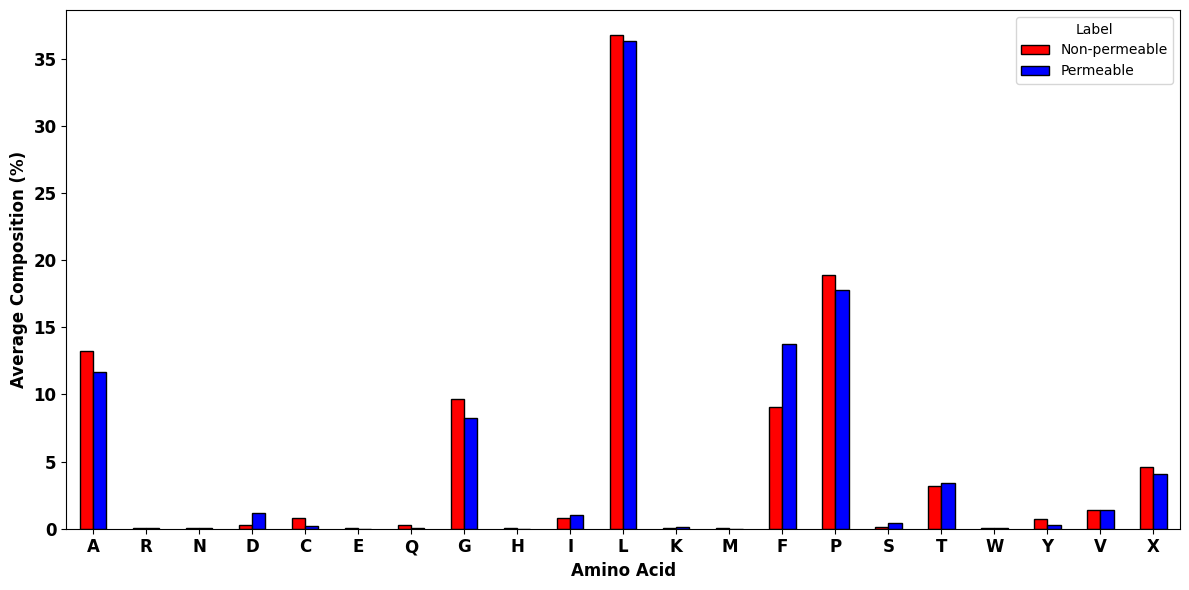

In [15]:
avg_comp_df = average_composition.T
avg_comp_df.columns = ['Non-permeable', 'Permeable']
avg_comp_df = avg_comp_df.reset_index().rename(columns={'index': 'Amino Acid'})

# Plot
plt.figure(figsize=(12, 6))
avg_comp_df.set_index('Amino Acid').plot(
    kind='bar',
    figsize=(12, 6),
    color=['red', 'blue'],
    edgecolor='black'
)

plt.xlabel("Amino Acid", fontsize=12, fontweight='bold')
plt.ylabel("Average Composition (%)", fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)
plt.legend(title="Label")
plt.tight_layout()
plt.savefig("/home/users/akshay/PCPpred/PAMPA/average_amino_acid_composition.png", dpi=600)
plt.show()

In [16]:
m_train = pd.read_csv('/home/users/akshay/PCPpred/PAMPA/features/Monomeric/Train_mon_comp.csv')
m_test = pd.read_csv('/home/users/akshay/PCPpred/PAMPA/features/Monomeric/Test_mon_comp.csv')
m_df = pd.concat([m_train, m_test], axis=0, ignore_index=True)
m_df['Label'] = m_df['Permeability'].apply(lambda x: 1 if x > -6 else 0)

average_mono_composition = m_df.groupby('Label')[all_residues].mean() * 100
average_mono_composition = average_mono_composition.round(3)
average_mono_composition

,(N->O)Leu,(N->O)Tyr,(N->O)Val,(N->O)Val(3-OH),(N->O)xiIle,-aze,-mor,-nme2,-pip,-pyrro,...,meM,meN,meQ,meS,meT,meV,meW,meY,medl-,pentyl_Gly
Label,,,,,,,,,,,,,,,,,,,,,
0,0.000,0.000,0.000,0.000,0.005,0.0,0.0,0.0,0.318,0.0,...,0.005,0.000,0.009,0.007,0.076,0.096,0.0,0.130,0.000,0.272
1,0.017,0.003,0.003,0.003,0.000,0.0,0.0,0.0,1.262,0.0,...,0.000,0.004,0.000,0.037,0.010,0.513,0.0,0.095,0.003,0.347


<Figure size 1400x700 with 0 Axes>

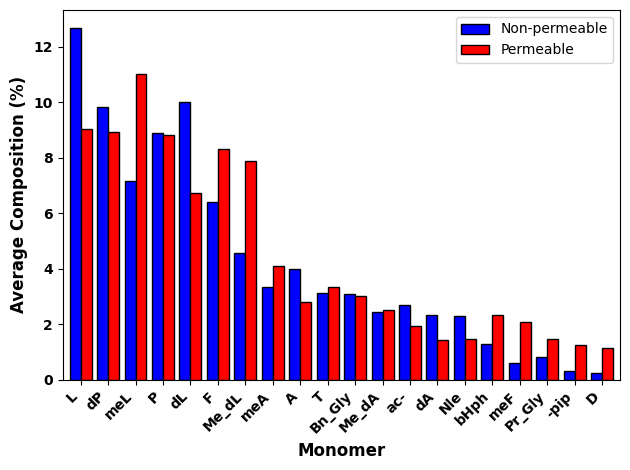

In [17]:
overall_mean = average_mono_composition.mean()
top_n = 20
top_monomers = overall_mean.sort_values(ascending=False).head(top_n).index

# Filter and reorder dataframe to plot
plot_df = average_mono_composition[top_monomers].transpose()

# Plot
plt.figure(figsize=(14, 7))
plot_df.plot(kind='bar', color=['blue', 'red'], edgecolor='black', width=0.8)

plt.xlabel("Monomer", fontsize=12, fontweight='bold')
plt.ylabel("Average Composition (%)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(fontweight='bold', fontsize=10)
plt.legend(['Non-permeable', 'Permeable'], fontsize=10)
plt.tight_layout()

# Save and show
plt.savefig(f"/home/users/akshay/PCPpred/PAMPA/top_{top_n}_monomer_composition_combined.png", dpi=600)
plt.show()

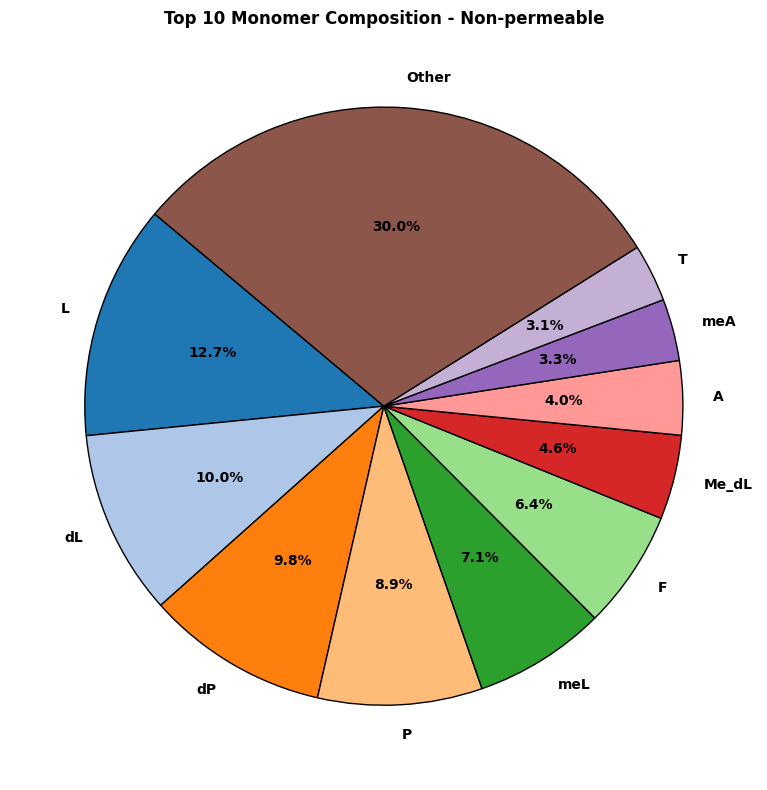

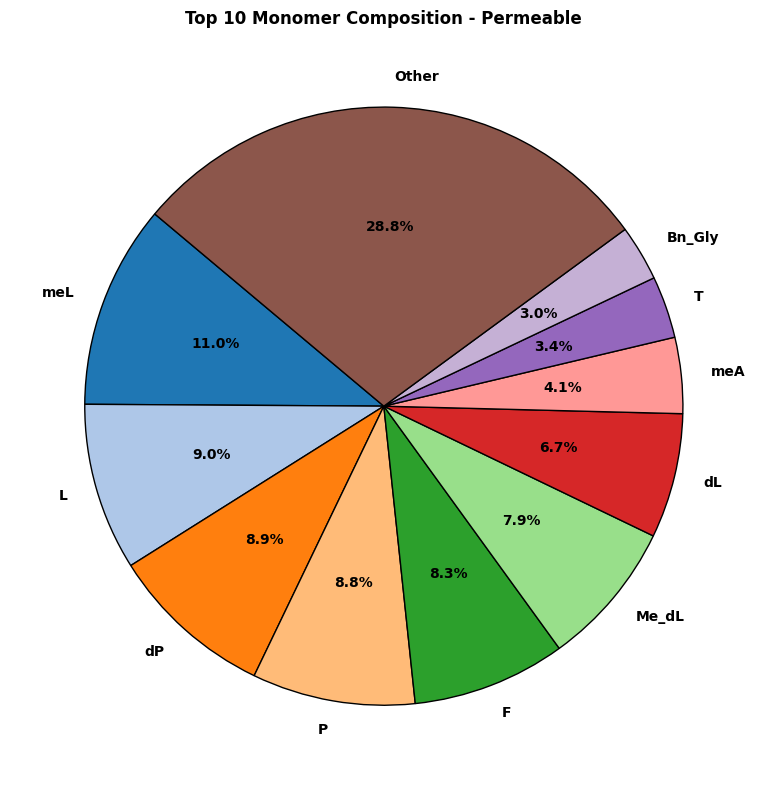

In [18]:
top_n = 10
colors = plt.cm.tab20.colors

for label in [0, 1]:
    sorted_monomers = average_mono_composition.loc[label].sort_values(ascending=False)
    top_monomers = sorted_monomers.head(top_n)
    other_sum = sorted_monomers.iloc[top_n:].sum()

    pie_data = top_monomers.copy()
    pie_data['Other'] = other_sum

    plt.figure(figsize=(8, 8))
    pie_data.plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'black'},
        fontsize=10,
        textprops={'fontweight': 'bold'}
    )
    label_name = "Non-permeable" if label == 0 else "Permeable"
    plt.title(f"Top {top_n} Monomer Composition - {label_name}", fontweight='bold')
    plt.ylabel('')  
    plt.tight_layout()
    plt.savefig(f"/home/users/akshay/PCPpred/PAMPA/monomer_composition_pie_chart_label_{label}.png", dpi=300)
    plt.show()


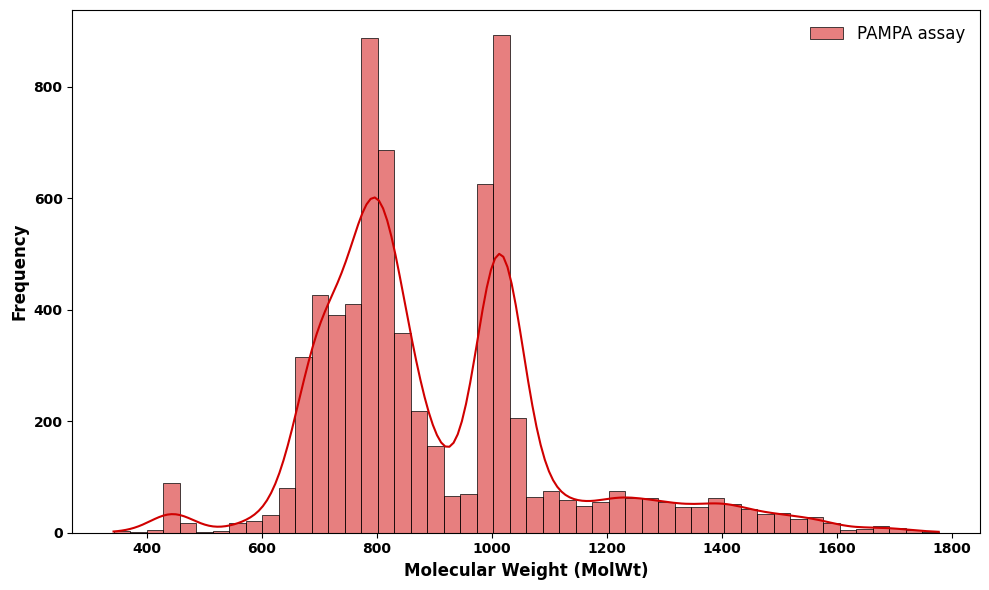

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['MolWt'], bins=50, kde=True, color="#D00000", edgecolor='black', linewidth=0.5, label='PAMPA assay')

plt.xlabel('Molecular Weight (MolWt)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend(title='', fontsize=12, loc='upper right', frameon=False)
plt.tight_layout()

plt.savefig("/home/users/akshay/PCPpred/PAMPA/molwt_distribution_pampa.png", dpi=600)
plt.show()